# Principal Component Analysis with Cancer Data

In [285]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [286]:
Df = pd.read_csv('Cancer.csv')

In [287]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
Df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [288]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [289]:
Df.shape

(699, 11)

In [290]:
Df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [291]:
Df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [292]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

Df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [293]:
Df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [294]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

Df['Bare Nuclei'].isin(['?']).sum()

16

In [295]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [296]:
Df['Bare Nuclei'].mode()[0]

'1'

In [297]:
Df['Bare Nuclei'].replace('?','1',inplace=True)

In [298]:
Df['Bare Nuclei'].isin(['?']).sum() # all unknown values are replace by 1

0

In [299]:
Df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [300]:
Df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [301]:
Df['Bare Nuclei']=Df['Bare Nuclei'].astype("int64")

In [302]:
Df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [303]:
Df[Df.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [304]:
Df[Df['ID'] ==1218860]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
207,1218860,1,1,1,1,1,1,3,1,1,2
208,1218860,1,1,1,1,1,1,3,1,1,2


In [305]:
Df.drop_duplicates(subset = None, keep='first', inplace= True)

In [306]:
Df.shape

(690, 11)

In [307]:
Df.reset_index(drop = True, inplace= True)

In [308]:
Df.tail(1)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
689,897471,4,8,8,5,4,5,10,4,1,4


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [309]:
# Check for correlation of variables
Df.iloc[:,1:].corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [310]:
# Target variable shows high correlation with most of these variables like with cell size,cell shape,Bare Nuclei.
# cell shape & cell size are highly correlated with each other.

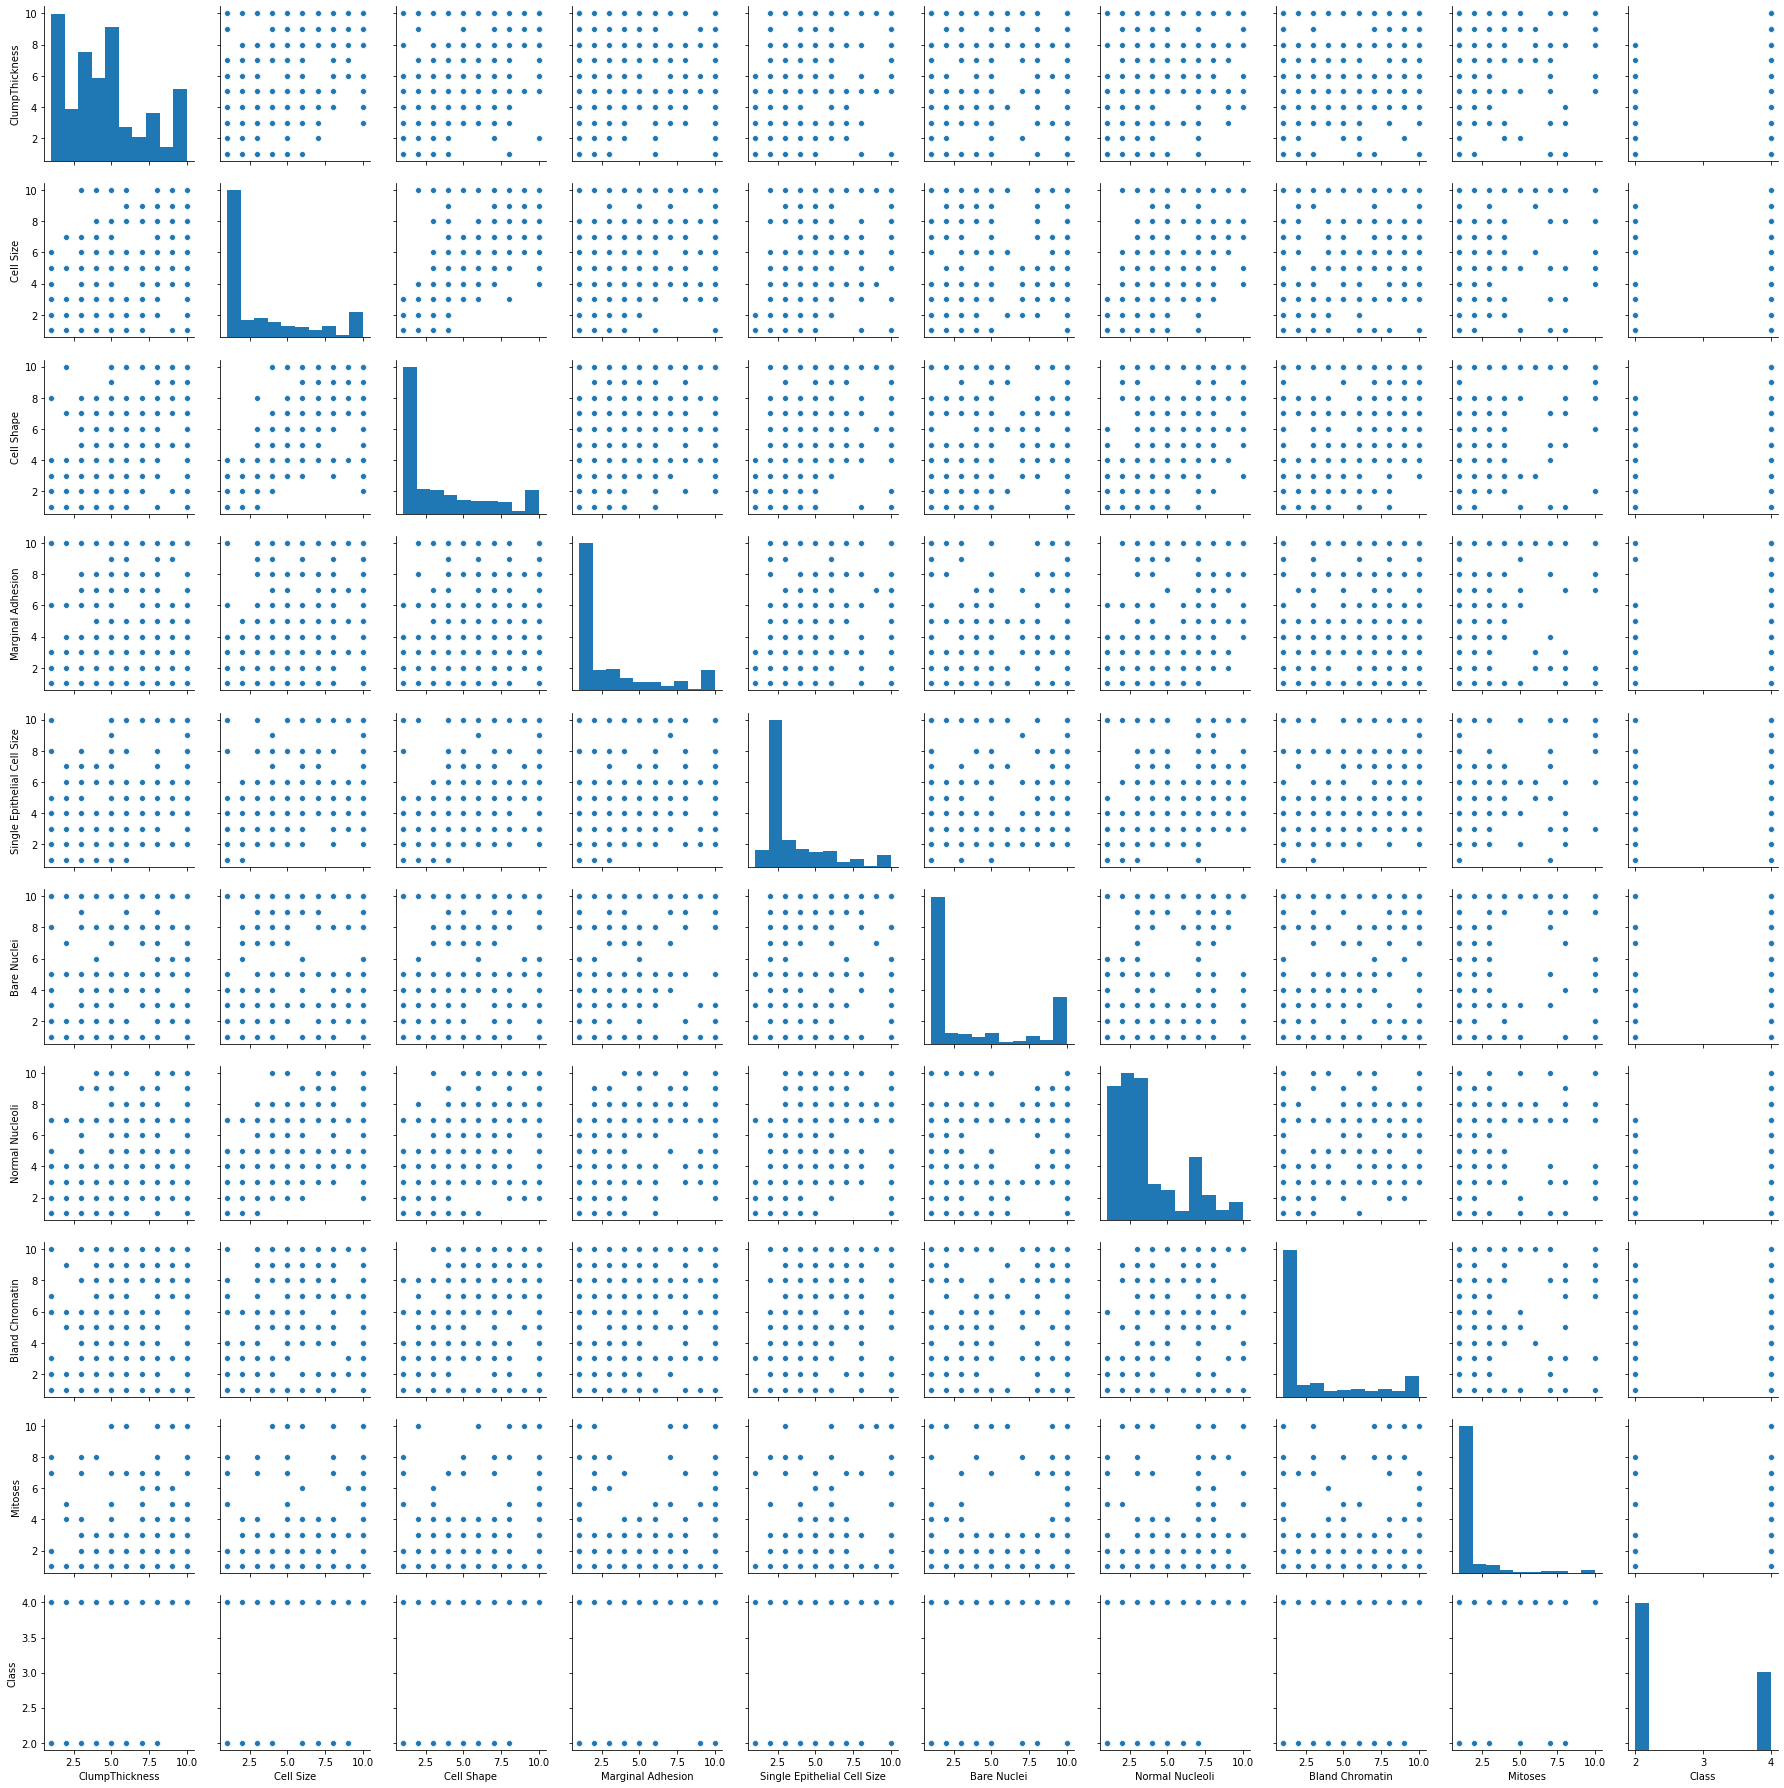

In [311]:
#Let us check the pair plot
sns.pairplot(Df.iloc[:,1:])

In [312]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

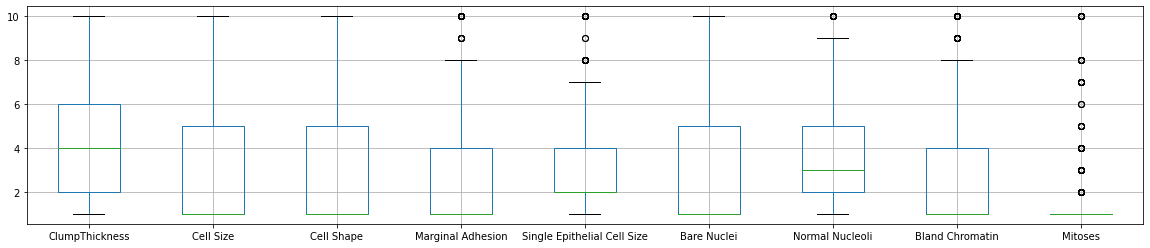

In [313]:
# We could see most of the outliers are now removed.
Df.iloc[:,1:-1].boxplot(figsize= (20,4))

In [314]:
pd.crosstab(Df['Marginal Adhesion'],Df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [315]:
Df['Marginal Adhesion'] = np.where(Df['Marginal Adhesion']>4,4,Df['Marginal Adhesion'])

In [316]:
pd.crosstab(Df['Marginal Adhesion'],Df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,15,161


In [317]:
pd.crosstab(Df['Single Epithelial Cell Size'],Df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [318]:
Df['Single Epithelial Cell Size'] = np.where(Df['Single Epithelial Cell Size']>3,3,Df['Single Epithelial Cell Size'])

In [319]:
pd.crosstab(Df['Single Epithelial Cell Size'],Df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,49,214


In [320]:
pd.crosstab(Df['Normal Nucleoli'],Df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [321]:
Df['Normal Nucleoli'] = np.where(Df['Normal Nucleoli']>4,4,Df['Normal Nucleoli'])

In [322]:
pd.crosstab(Df['Normal Nucleoli'],Df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,20,194


In [323]:
pd.crosstab(Df['Bland Chromatin'],Df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


{'whiskers': [<matplotlib.lines.Line2D at 0x23d56fc9a08>,
 'caps': [<matplotlib.lines.Line2D at 0x23d56decf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d56dec6c8>],
 'medians': [<matplotlib.lines.Line2D at 0x23d56defec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d56deffc8>],
 'means': []}

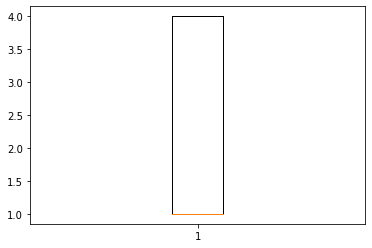

In [324]:
plt.boxplot(np.where(Df['Bland Chromatin']>4,4,Df['Bland Chromatin']))

In [325]:
Df['Bland Chromatin'] = np.where(Df['Bland Chromatin']>4,4,Df['Bland Chromatin'])

In [326]:
pd.crosstab(Df['Bland Chromatin'],Df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,14,162


In [327]:
pd.crosstab(Df['Mitoses'],Df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


{'whiskers': [<matplotlib.lines.Line2D at 0x23d56e42a88>,
 'caps': [<matplotlib.lines.Line2D at 0x23d56e56f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d56e56748>],
 'medians': [<matplotlib.lines.Line2D at 0x23d56e59cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d56e59d48>],
 'means': []}

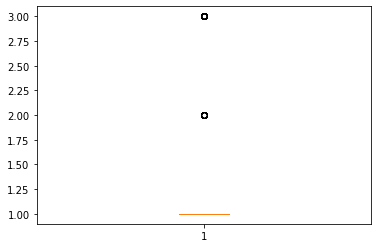

In [328]:
plt.boxplot(np.where(Df['Mitoses']>3,3,Df['Mitoses']))

In [329]:
Df['Mitoses'] = np.where(Df['Mitoses']>3,3,Df['Mitoses'])

In [330]:
pd.crosstab(Df['Mitoses'],Df['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,5,79


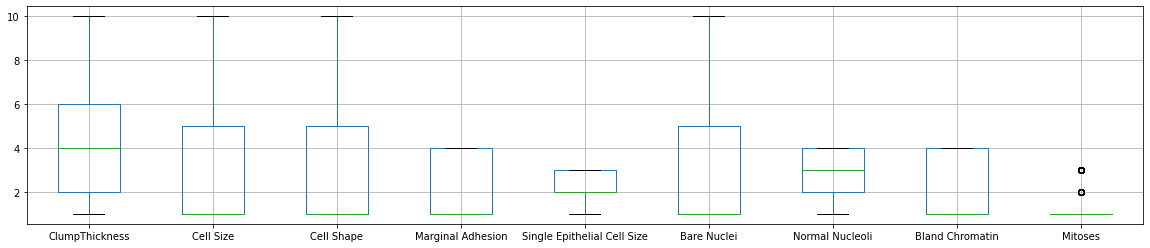

In [331]:
Df.iloc[:,1:-1].boxplot(figsize= (20,4))

In [332]:
df_new =Df.drop(['ID','Class'], axis=1)

In [333]:
from scipy.stats import zscore

In [334]:
df_new = df_new.apply(zscore)
df_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.536685,-0.686858,0.322808,-0.718310,-0.438024
1,0.202823,0.285065,0.268920,1.530101,1.161998,1.803153,0.322808,0.046557,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.536685,-0.410190,0.322808,-0.718310,-0.438024
3,0.558020,1.600748,1.620866,-0.781803,1.161998,0.143146,0.322808,1.576291,-0.438024
4,-0.152375,-0.701698,-0.745040,0.759466,-0.536685,-0.686858,0.322808,-0.718310,-0.438024


# Q6 Create a covariance matrix for identifying Principal components

In [335]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(df_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.55329897 0.56876059 0.59150555
  0.54669109 0.57214901 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.69491481 0.68556472
  0.66940328 0.72684553 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.68116899 0.70518656
  0.65890363 0.71910723 0.48167882]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.63617971 0.69693138
  0.60427482 0.65326018 0.42473633]
 [0.56876059 0.69491481 0.68116899 0.63617971 1.00145138 0.6348984
  0.57938679 0.66617045 0.42529666]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.6348984  1.00145138
  0.64237847 0.64168219 0.45258904]
 [0.54669109 0.66940328 0.65890363 0.60427482 0.57938679 0.64237847
  1.00145138 0.65441737 0.37940435]
 [0.57214901 0.72684553 0.71910723 0.65326018 0.66617045 0.64168219
  0.65441737 1.00145138 0.49312095]
 [0.42745595 0.51098944 0.48167882 0.42473633 0.42529666 0.45258904
  0.37940435 0.49312095 1.00145138]]


In [336]:
cov_matrix.shape

(9, 9)

# Q7 Identify eigen values and eigen vector

In [337]:
# Step 2- Get eigen values and eigen vector

cov_matrix * eigen_vector = eigen_value * Idendity_Matrix(shape of cov_matrix) * eigen_vector

In [338]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.3114354   0.01568016  0.02047029  0.90541669  0.07476755 -0.20399848
   0.10539206 -0.14051697 -0.06712406]
 [ 0.37194432 -0.03811526  0.7164469   0.01327345  0.0124912   0.21915718
  -0.16821058  0.49169294  0.16878882]
 [ 0.36954798 -0.07658035 -0.68846816  0.06493104 -0.12536091  0.25767414
  -0.16140193  0.50385521  0.13165607]
 [ 0.33901535 -0.15284936 -0.05474049 -0.2499106   0.50978592 -0.44868011
  -0.25095696  0.09542832 -0.5128083 ]
 [ 0.33213311 -0.10331615 -0.02823789 -0.07803192  0.19514245  0.30069671
  -0.47696574 -0.63409222  0.33772571]
 [ 0.3414089  -0.10333249  0.07794801 -0.10158408 -0.58656918  0.2695813
   0.09087582 -0.24162259 -0.61072888]
 [ 0.32338417 -0.24134232 -0.03010916 -0.18734513  0.33818548  0.18091422
   0.78876393 -0.08730706  0.15588898]
 [ 0.34571185  0.00531696  0.00642328 -0.21995643 -0.45632921 -0.66445249
   0.06545056 -0.07679928  0.41487057]
 [ 0.24940299  0.94310533 -0.03845512 -0.11612816  0.11792794  0.07297459
   0.

In [339]:
v_5 = eigenvectors[:,5]

In [340]:
np.matmul(cov_matrix,v_5)

array([-0.06231563,  0.06694617,  0.07871199, -0.13705879,  0.09185414,
        0.08234928,  0.05526406, -0.202971  ,  0.02229163])

In [341]:
np.matmul(eigenvalues[5]*np.identity(cov_matrix.shape[0]),v_5)

array([-0.06231563,  0.06694617,  0.07871199, -0.13705879,  0.09185414,
        0.08234928,  0.05526406, -0.202971  ,  0.02229163])

# Q8 Find variance and cumulative variance by each eigen vector

In [342]:
eigenvalues

array([5.94976514, 0.68946786, 0.09158605, 0.4827925 , 0.28309588,
       0.30547105, 0.42919995, 0.38035011, 0.40133385])

In [343]:
sorted(eigenvalues,reverse=True)

[5.949765137779066,
 0.689467863059122,
 0.48279250287366376,
 0.4291999543122084,
 0.40133385277339584,
 0.3803501132718857,
 0.30547105048901674,
 0.2830958833765806,
 0.09158605135388823]

In [344]:
tot = sum(eigenvalues)
var_exp = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
var_exp

[66.01269210836998,
 7.649651491911996,
 5.356586706601518,
 4.76197694881017,
 4.4528023278722975,
 4.219987569151839,
 3.389203764684903,
 3.1409511054180994,
 1.0161479771792106]

In [345]:
cum_var = np.cumsum(var_exp)
cum_var

array([ 66.01269211,  73.6623436 ,  79.01893031,  83.78090726,
        88.23370958,  92.45369715,  95.84290092,  98.98385202,
       100.        ])

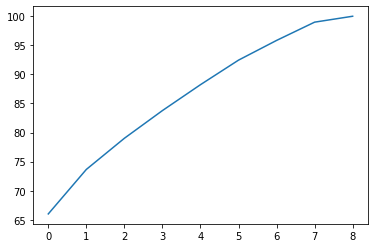

In [346]:
plt.plot(cum_var)

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [347]:
from sklearn.decomposition import PCA

In [348]:
pca = PCA(n_components=7)
pca_df = pca.fit_transform(df_new)

In [349]:
pca_df.T

array([[-1.4041299 ,  1.80009293, -1.53091511, ...,  3.54596616,
         2.67544579,  3.01970712],
       [-0.16192711, -1.05929394, -0.20165499, ...,  0.22790085,
        -1.19958527, -1.2799403 ],
       [-0.5813698 ,  0.47119879,  0.08993856, ...,  0.59831147,
         1.06422556,  1.04843898],
       ...,
       [ 0.18622185, -1.32900516,  0.06493736, ...,  1.53630976,
         0.79160414,  0.71163103],
       [ 0.27307077,  0.79388265,  0.24009745, ..., -1.33986905,
        -0.45028227, -0.72402557],
       [ 0.12081955,  0.23487236,  0.3403235 , ...,  0.26509061,
        -0.53481417, -0.28604892]])

In [350]:
pca.components_

array([[ 0.3114354 ,  0.37194432,  0.36954798,  0.33901535,  0.33213311,
         0.3414089 ,  0.32338417,  0.34571185,  0.24940299],
       [ 0.01568016, -0.03811526, -0.07658035, -0.15284936, -0.10331615,
        -0.10333249, -0.24134232,  0.00531696,  0.94310533],
       [-0.90541669, -0.01327345, -0.06493104,  0.2499106 ,  0.07803192,
         0.10158408,  0.18734513,  0.21995643,  0.11612816],
       [ 0.10539206, -0.16821058, -0.16140193, -0.25095696, -0.47696574,
         0.09087582,  0.78876393,  0.06545056,  0.09685397],
       [-0.06712406,  0.16878882,  0.13165607, -0.5128083 ,  0.33772571,
        -0.61072888,  0.15588898,  0.41487057, -0.05684738],
       [ 0.14051697, -0.49169294, -0.50385521, -0.09542832,  0.63409222,
         0.24162259,  0.08730706,  0.07679928,  0.03925976],
       [-0.20399848,  0.21915718,  0.25767414, -0.44868011,  0.30069671,
         0.2695813 ,  0.18091422, -0.66445249,  0.07297459]])

In [351]:
pca.explained_variance_

array([5.94976514, 0.68946786, 0.4827925 , 0.42919995, 0.40133385,
       0.38035011, 0.30547105])

# Q10 Find correlation between components and features

In [352]:
Df_component = pd.DataFrame(pca.components_ , columns = list(df_new))
Df_component

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.311435,0.371944,0.369548,0.339015,0.332133,0.341409,0.323384,0.345712,0.249403
1,0.015680,-0.038115,-0.076580,-0.152849,-0.103316,-0.103332,-0.241342,0.005317,0.943105
2,-0.905417,-0.013273,-0.064931,0.249911,0.078032,0.101584,0.187345,0.219956,0.116128
3,0.105392,-0.168211,-0.161402,-0.250957,-0.476966,0.090876,0.788764,0.065451,0.096854
4,-0.067124,0.168789,0.131656,-0.512808,0.337726,-0.610729,0.155889,0.414871,-0.056847
5,0.140517,-0.491693,-0.503855,-0.095428,0.634092,0.241623,0.087307,0.076799,0.039260
6,-0.203998,0.219157,0.257674,-0.448680,0.300697,0.269581,0.180914,-0.664452,0.072975


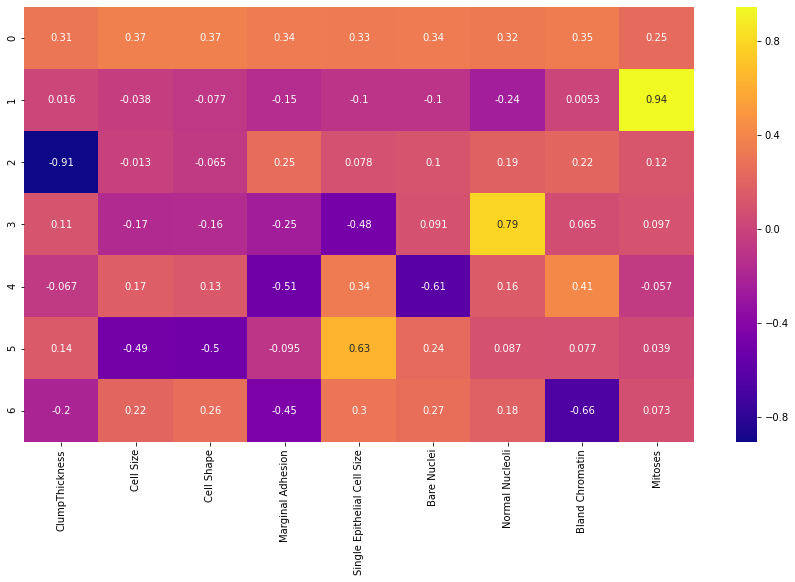

In [353]:
plt.figure(figsize=(15,8))
sns.heatmap(Df_component,cmap= 'plasma',annot= True)